
# Big Mart Sales Prediction
                                                                    Author: Kavita Kusagur

## Table of Content

__1. Problem Statement__<br/>
__2. Data Loading and Description__<br/>
__3. Exploratory Data Analysis__<br/>
__4. Exporting Data__<br/>
__5. Model Building and Evaluation__<br/>
__6. Conclusions__<br/>

<a id = section1></a>

<a id=section1></a>
## 1. Problem Statement


Given the dataset containing __sales of Big Mart__, make a model  is to build a predictive model and find out the sales of each product at a given Big Mart store and also to understand the properties of products and stores which play a key role in increasing sales. Evaluate the model using possible __model evaluation techniques__. 

<a id = section2></a>


<a id=section2></a>
## 2. Data Loading and Description

__Importing Packages__

In [8]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
import warnings                          #Ignores any warnings
warnings.filterwarnings("ignore")

#### Importing the Datasets

In [9]:
train = pd.read_csv("Train.csv")
test = pd.read_csv("Test.csv")

<a id = section3></a>

<a id=section3></a>

## 3. Exploratory Data Analysis

#### Check the shape of the datasets

In [10]:
train.shape, test.shape

((8523, 12), (5681, 11))

#### Check the columns present in the dataset

In [11]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [12]:
test.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [13]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


- If we look at variable __Item_Identifier__, We can see different group of letters per each product such as 'FD' (Food), 'Dr' (Drinks) and 'NC' (Non-Consumable).<br/>
- On the other hand, regarding __Item_Visibility__,there are items with the value _zero_. This doe not make lot of sense, since this is indicating those items are not visible on the store.

In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB


- Most of the items in the train dataset present 8523 non-null values. However, there are some cases such as __Item_Weight__ and __Outlet_Size__ which seem to present _Null_ values. We always have to consider if this absence of values has a sigificant meaning. In this case, it does not since all values should have weight higher than 0 and a store cannot exist with zero size.<br/>
<br/>
- Morever, from the 12 feaures, 5 are numeric and 7 categorical.

In [15]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [16]:
# Check for duplicates
idsUnique = len(set(train.Item_Identifier))
bm_data = pd.concat([train, test],ignore_index=True)
idsTotal = bm_data.shape[0]
idsDupli = idsTotal - idsUnique

print("There are " + str(idsUnique) + " unique IDs and " + str(idsDupli) +" duplicate IDs for " + str(idsTotal) + " total entries.")

There are 1559 unique IDs and 12645 duplicate IDs for 14204 total entries.


- Before starting the analysis, it is interesting to check if the dataset suffers from duplicate values.<br/> 
In this case, the way to see if there are any duplicates is using the __Item_Identifier__ feature. Since a product can exist in more than one store, it is expected for this repetition to exist. 
- Curious fact is that there seems to be 1559 unique items only available in one single store.<br/>


<a id=section301></a>
### 3.1. Univariate analysis

Let's begin by generating distribution for __Item_Outlet_Sales__, our target variable.

<a id=section3011></a>
#### 3.1.1. Distribution of the target variable : __Item_Outlet_Sales__<br/>

Text(0.5, 1.0, 'Item Outlet Sales Distribution\n')

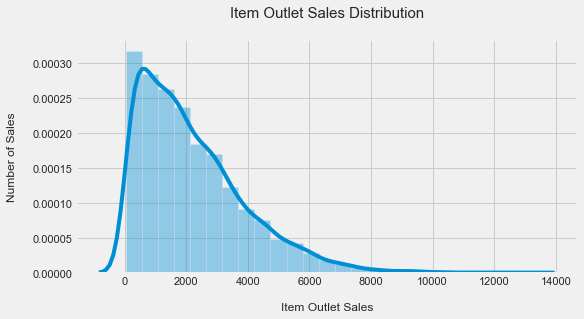

In [17]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(8,4))
sns.distplot(train.Item_Outlet_Sales, bins=25)
plt.ticklabel_format(style='plain', axis='x', scilimits=(0,1))
plt.xlabel("\nItem Outlet Sales", fontsize=12)
plt.ylabel("Number of Sales\n", fontsize=12)
plt.title("Item Outlet Sales Distribution\n", fontsize=15)

In [18]:
print("Skew  :", train.Item_Outlet_Sales.skew())
print("Kurtosis : %f" % train.Item_Outlet_Sales.kurt())

Skew  : 1.1775306028542798
Kurtosis : 1.615877


#### Observation :
- We can see that our target variable is __skewed to the right__, towards the higher sales, with higher concentration on lower sales. So we will concentrate on that.

<a id=section3012></a>
#### 3.1.2. Numerical variables

Let's consider our predictors. <br/>Let's start by seeing which our features are numeric.

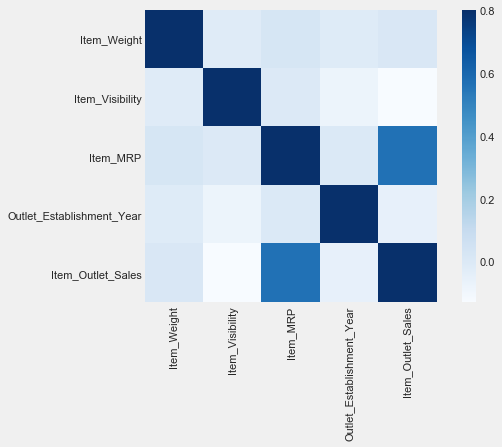

In [19]:
numeric_features = train.select_dtypes(include=[np.number])
corr = numeric_features.corr()

#correlation matrix
f, ax = plt.subplots(figsize=(8, 5))
sns.heatmap(corr, vmax=.8, square=True, cmap='Blues')

#### Observation:
- __Item_Visibility__ is with the lowest correlation with our target variable.Therefore, the less visible the product is in the store the higher the price will be. This variable is expected to have high impact in the sales increase.<br/>
Neverthless, since this is not an expected behaviour and we should investigate.
- __Item_MRP__ is __highly(positively) correlated__ with __Item_Outlet_Sales__.


<a id=section3013></a>
#### 3.1.3. Categorical Variables

<a id=section30131></a>
#### 3.1.3.1. Distribution of the Item_Fat_Content

In [20]:
train.Item_Fat_Content.value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

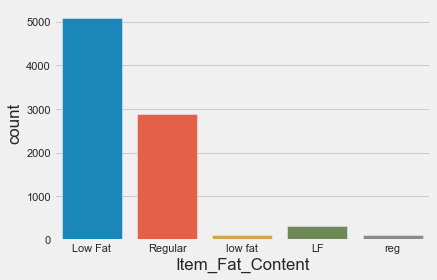

In [21]:
sns.countplot(train.Item_Fat_Content)

#### Observation :
- For __Item_Fat_Content__ there are two possible choices : "Low Fat" or "Regular".
- However, in our data we have these two types of Fat written in different manners.This must be corrected.

<a id=section30132></a>
#### 3.1.3.2.Distribution of the Item_Type

In [22]:
train.Item_Type.value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

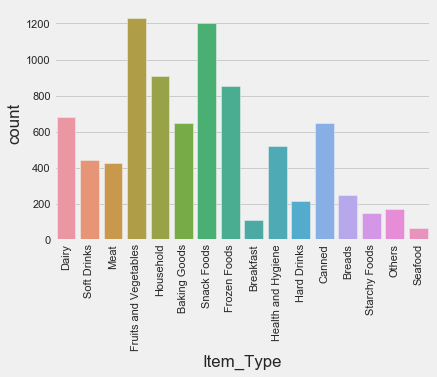

In [23]:
sns.countplot(train.Item_Type)
plt.xticks(rotation=90)

#### Observation :
- For __Item_Type__, there are _sixteen different types_. This is a high number of unique values for a categorical varaible. We need to think of the _way to reduce this number_.

<a id=section30133></a>
#### 3.1.3.3. Distribution of the Outlet_Size

In [24]:
train.Outlet_Size.value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

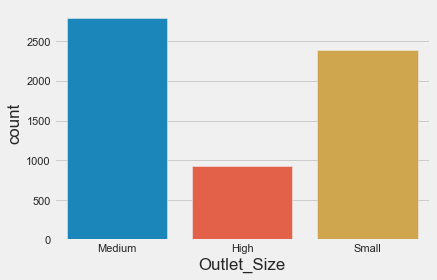

In [25]:
sns.countplot(train.Outlet_Size)

#### Observation :
- There seems to be a _low number of stores with size equals to "High"_.
- Most of the existent stores seem to be either "Small" or "Medium".
- Need to see how this varaible relates to our target variable.
- If "High" size stores have better results as initially expected or due to this number distribution sales results might be similar.

<a id=section30134></a>
#### 3.1.3.4. Distribution of the Outlet_Location_Type

In [26]:
train.Outlet_Location_Type.value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

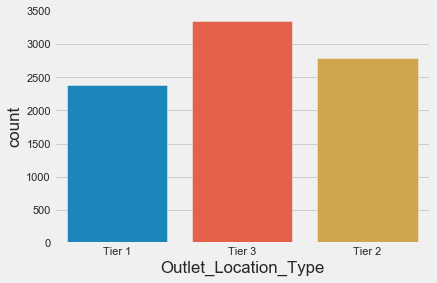

In [27]:
sns.countplot(train.Outlet_Location_Type)

#### Observation :
- Bigmart appears to be a supermarket brand that is more present in "Small" to "Medium" size cities than in more densily populated locations.

<a id=section30135></a>
#### 3.1.3.5.Distribution of the Outlet_Type

In [28]:
train.Outlet_Type.value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

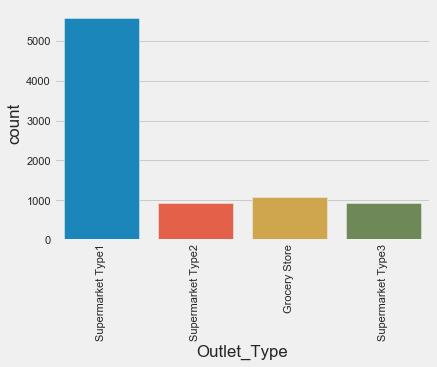

In [29]:
sns.countplot(train.Outlet_Type)
plt.xticks(rotation=90)

#### Observations :
- It looks like __Supermarket Type2, Grocery Store and Supermarket Type3__ all have low expression in this distribution.
- Maybe, we can create a single category with all of the three.
- Neverthless, before doing this, we must see their impact in the __Item_Outlet_Sales__.

<a id=section302></a>
### 3.2. Bivariate Analysis

Now, let's understand the relationship between our target variable and the predictors as well as the relationship among predictors.

<a id=section3021></a>
#### 3.2.1. Numerical Variables

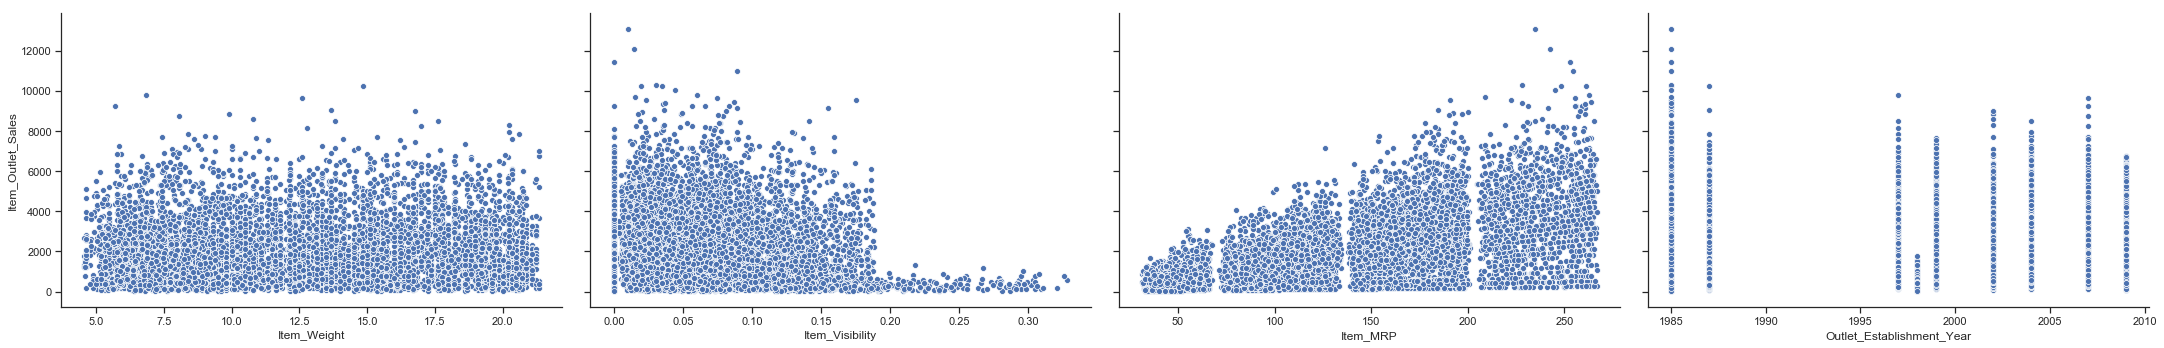

In [30]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(train, x_vars=['Item_Weight','Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year'], y_vars='Item_Outlet_Sales', size=5, aspect=1.5)   

<a id=section30211></a>
#### 3.2.1.1. Item_Weight Vs. Item_Outlet_Sales Analysis

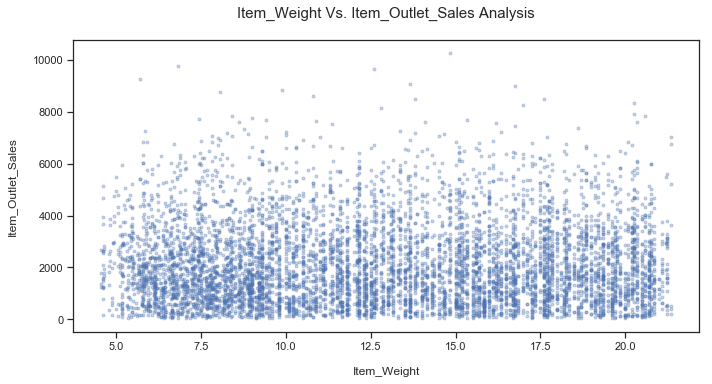

In [31]:
plt.figure(figsize=(10,5))
plt.xlabel("\nItem_Weight")
plt.ylabel("Item_Outlet_Sales\n")
plt.title("Item_Weight Vs. Item_Outlet_Sales Analysis\n", fontsize=15)
plt.plot(train.Item_Weight, train["Item_Outlet_Sales"],'.', alpha = 0.3)

#### Obsevation :
- The variable __Item_weight__ have _low correlation_ with the variable Item_Outlet_Sales.
- The lower ‘count’ of __Item_Weight and Outlet_Size__ confirms the findings from the missing value check.

<a id=section30212></a>
#### 3.2.1.2. Item_Visibility Vs. Item_Outlet_Sales Analysis

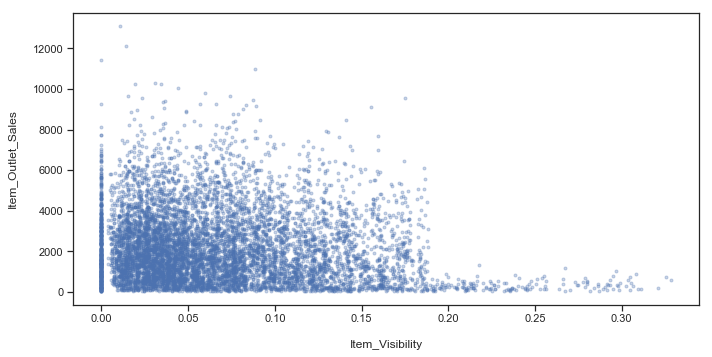

In [32]:
plt.figure(figsize=(10,5))
plt.xlabel("\nItem_Visibility")
plt.ylabel("Item_Outlet_Sales\n")
#plt.title("Item_Visibility Vs. Item_Outlet_Sales_Analysis\n", fontsize=15)
plt.plot(train.Item_Visibility, train["Item_Outlet_Sales"],'.', alpha = 0.3)

#### Observation :
- Maybe, we think that _Visibility of items will have high correlation to Sales of Items_. 
- However, seeing at the above picture, we see that _items have low Visibility which still have high sales_.
Even, _Items with Visibility equal 0 still sell very well_.
- __Item_Visibility__ has a min value of _zero_. This makes no practical sense because when a product is being sold in a store, the visibility cannot be 0.

<a id=section30213></a>
#### 3.2.1.3. Outlet_Establishment_Year Vs. Item_Outlet_Sales Analysis

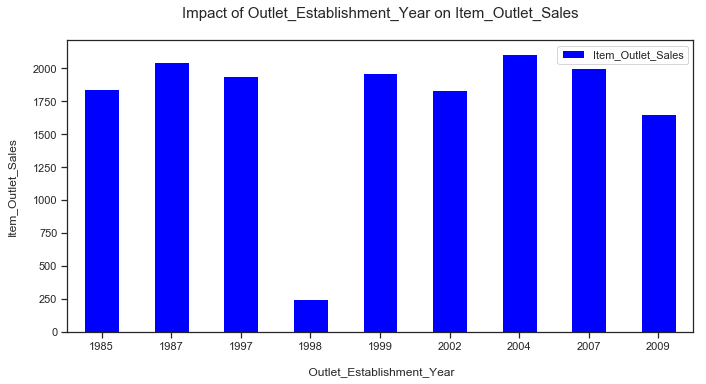

In [33]:
Outlet_Establishment_Year_pivot = \
train.pivot_table(index='Outlet_Establishment_Year', values="Item_Outlet_Sales", aggfunc=np.median)

Outlet_Establishment_Year_pivot.plot(kind='bar', color='blue',figsize=(10,5))
plt.xlabel("\n Outlet_Establishment_Year")
plt.ylabel("Item_Outlet_Sales\n")
plt.title("Impact of Outlet_Establishment_Year on Item_Outlet_Sales\n", fontsize=15)
plt.xticks(rotation=0)
plt.show()

#### Observations :<br/>

- There seems to be no significant meaning between the year of __Outlet_Establishment_Year__ and __Item_Outlet_Sales__ for the items. 
- 1998 has low values but there might be due to the fact the few stores opened in that year.
- __Outlet_Establishment_Years__ _vary from 1985 to 2009_. The values might not be apt in this form. Rather, if we can convert them to how old the particular store is, it should have a better impact on sales.



<a id=section3022></a>
#### 3.2.2. Categorial Variables

In [34]:
numeric_features = train.select_dtypes(include=[np.object])
numeric_features.dtypes

Item_Identifier         object
Item_Fat_Content        object
Item_Type               object
Outlet_Identifier       object
Outlet_Size             object
Outlet_Location_Type    object
Outlet_Type             object
dtype: object

<a id=section30221></a>
#### 3.2.2.1. Impact of Item_Fat_Content on Item_Outlet_Sales

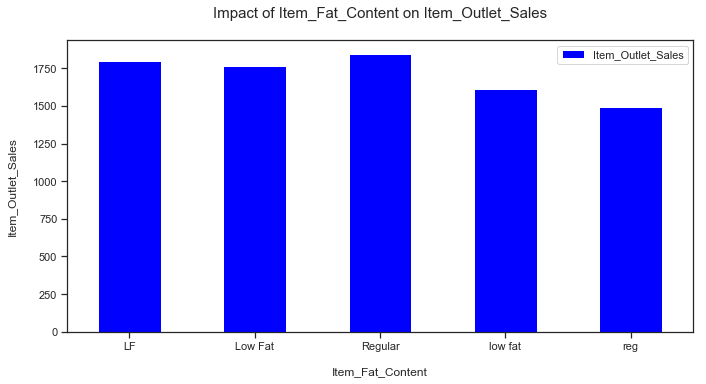

In [35]:
Item_Fat_Content_pivot = \
train.pivot_table(index='Item_Fat_Content', values="Item_Outlet_Sales", aggfunc=np.median)

Item_Fat_Content_pivot.plot(kind='bar', color='blue',figsize=(10,5))
plt.xlabel("\nItem_Fat_Content")
plt.ylabel("Item_Outlet_Sales\n")
plt.title("Impact of Item_Fat_Content on Item_Outlet_Sales\n", fontsize=15)
plt.xticks(rotation=0)
plt.show()

#### Observation :
- Daily use products should have a higher tendancy to sell as compared to the specific use products.
- __"Low Fat"__ products seem to have _higher sales_ values than __"Regular"__ products.

<a id=section30222></a>
#### 3.2.2.2. Impact of Outlet_Identifier on Item_Outlet_Sales

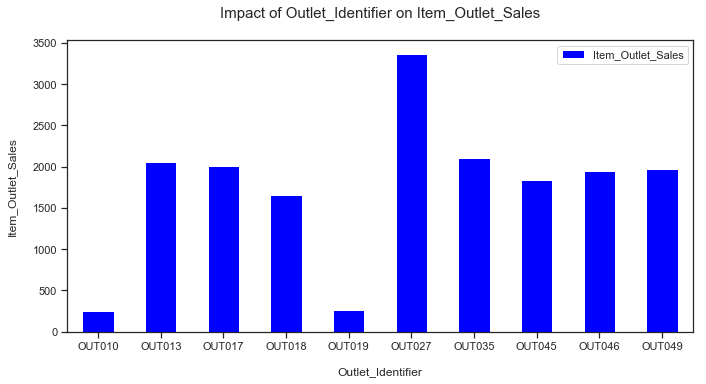

In [36]:
Outlet_Identifier_pivot = \
train.pivot_table(index='Outlet_Identifier', values="Item_Outlet_Sales", aggfunc=np.median)

Outlet_Identifier_pivot.plot(kind='bar', color='blue',figsize=(10,5))
plt.xlabel("\nOutlet_Identifier", fontsize=12)
plt.ylabel("Item_Outlet_Sales\n", fontsize=12)
plt.title("Impact of Outlet_Identifier on Item_Outlet_Sales\n", fontsize=15)
plt.xticks(rotation=0)
plt.show()

In [37]:
train.pivot_table(values='Outlet_Type', columns='Outlet_Identifier',aggfunc=lambda x:x.mode())

Outlet_Identifier,OUT010,OUT013,OUT017,OUT018,OUT019,OUT027,OUT035,OUT045,OUT046,OUT049
Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type1,Supermarket Type2,Grocery Store,Supermarket Type3,Supermarket Type1,Supermarket Type1,Supermarket Type1,Supermarket Type1


In [38]:
train.pivot_table(values='Outlet_Type', columns='Outlet_Size',aggfunc=lambda x:x.mode())

Outlet_Size,High,Medium,Small
Outlet_Type,Supermarket Type1,Supermarket Type3,Supermarket Type1


#### Observation :
- We see that, the __Grocery Stores ("OUT010, "OUT019")__ have the _lowest sales_ results which is expected followed by the Supermarket Type2 ("OUT018").
- Curiously, most stores are of type Supermarket Type1 of size "High" and do not have the best results.
- The _best results belong to_ __"OUT027"__ which is a "Medium" size __Supermarket Type3__.

<a id=section30223></a>
#### 3.2.2.3. Impact of Outlet_Size on Item_Outlet_Sales

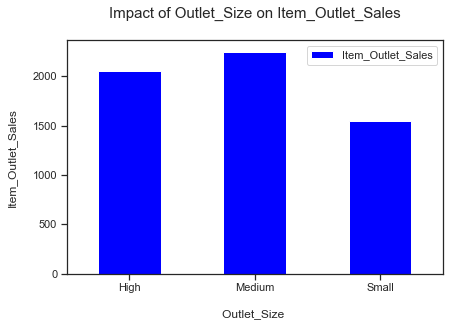

In [39]:
Outlet_Size_pivot = \
train.pivot_table(index='Outlet_Size', values="Item_Outlet_Sales", aggfunc=np.median)

Outlet_Size_pivot.plot(kind='bar', color='blue',figsize=(6,4))
plt.xlabel("\nOutlet_Size ")
plt.ylabel("Item_Outlet_Sales\n")
plt.title("Impact of Outlet_Size on Item_Outlet_Sales\n",fontsize=15)
plt.xticks(rotation=0)
plt.show()

#### Observation :
- The variable __Outlet_Size__ probably _don’t have high correlation with our target variable_. 
- Most stores have size “Medium” but still the “High” and “Small” stores which are clearly in an inferior number can beat or even come close to their numbers.

<a id=section30224></a>
#### 3.2.2.4. Impact of Outlet_Type on Item_Outlet_Sales

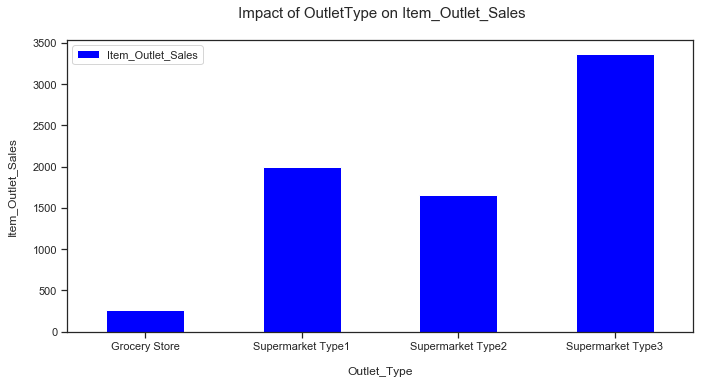

In [40]:
Outlet_Type_pivot= \
train.pivot_table(index="Outlet_Type",values="Item_Outlet_Sales",aggfunc=np.median)

Outlet_Type_pivot.plot(kind='bar', color='blue',figsize=(10,5))
plt.xlabel("\nOutlet_Type", fontsize=12)
plt.ylabel("Item_Outlet_Sales\n", fontsize=12)
plt.title(" Impact of OutletType on Item_Outlet_Sales\n ", fontsize=15)
plt.xticks(rotation=0)
plt.show()

#### Observation :
- From this analysis, possibly it would be a good idea to create a new feature that shows the sales ratio according to the store size.

<a id=section30225></a>
#### 3.2.2.5. Impact of Outlet_Location_Type on Item_Outlet_Sales

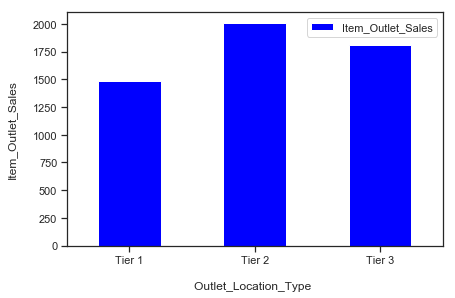

In [41]:
Outlet_Location_Type_pivot = \
train.pivot_table(index='Outlet_Location_Type', values="Item_Outlet_Sales", aggfunc=np.median)

Outlet_Location_Type_pivot.plot(kind='bar', color='blue',figsize=(6,4))
plt.xlabel("\nOutlet_Location_Type ")
plt.ylabel("Item_Outlet_Sales\n")
#plt.title("Impact of Outlet_Location_Type on Item_Outlet_Sales\n", fontsize=15)
plt.xticks(rotation=0)
plt.show()

In [42]:
train.pivot_table(values='Outlet_Location_Type', columns='Outlet_Type',aggfunc=lambda x:x.mode())

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Location_Type,Tier 3,Tier 2,Tier 3,Tier 3


#### Observation :
- The stores from Tier 2 cities that present the highest results, followed by Tier 3 cities,with Tier 1 cities with the lowest results of the three type of locations.
- From the pivot_table, it's easy to see that Tier 2 and Tier 3 cities are those that have highest representation of stores.

<a id=section303></a>
## Data Pre-Processing

Let's combine both train and test data sets into one, perform feature engineering and then divide 
them later again. This saves the trouble of performing the same steps twice on test and train. <br/>
Lets combine them into a dataframe ‘bm_data’ with a ‘source’ column specifying where each observation belongs.

In [43]:
train['source']='train'
test['source']='test'
bm_data = pd.concat([train, test],ignore_index=True, sort=False)
print("Train Shape :",train.shape, "\nTest Shape :",test.shape, "\nCombined dataset Shape :",bm_data.shape)

Train Shape : (8523, 13) 
Test Shape : (5681, 12) 
Combined dataset Shape : (14204, 13)


#### Check the descriptive statistics of the dataset

In [44]:
bm_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.792854,0.065953,141.004977,1997.830681,2181.288914
std,4.652502,0.051459,62.086938,8.371664,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,834.247400
50%,12.600000,0.054021,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [45]:
bm_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train


#### Check the info of the dataset

In [46]:
bm_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 13 columns):
Item_Identifier              14204 non-null object
Item_Weight                  11765 non-null float64
Item_Fat_Content             14204 non-null object
Item_Visibility              14204 non-null float64
Item_Type                    14204 non-null object
Item_MRP                     14204 non-null float64
Outlet_Identifier            14204 non-null object
Outlet_Establishment_Year    14204 non-null int64
Outlet_Size                  10188 non-null object
Outlet_Location_Type         14204 non-null object
Outlet_Type                  14204 non-null object
Item_Outlet_Sales            8523 non-null float64
source                       14204 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 1.4+ MB


#### Check the missing values present in the dataset. 

In [47]:
bm_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

Note that the __Item_Outlet_Sales__ is the target variable and missing values are ones in the test set. 
So we need not worry about it. 
But we’ll __impute the missing values in Item_Weight and Outlet_Size__ in the data cleaning section.

<a id = section3031></a>

<a id=section3031></a>
### Imputing Missing Values 

We found two variables with missing values – __Item_Weight__ and __Outlet_Size__.<br/>
Lets impute the former by the __average weight of the particular item__. 

#### Imputing  the mean for Item_Weight missing values

In [48]:
#aggfunc is mean by default ! Ignores NaN by default

#Determine the average weight per item:
item_avg_weight = bm_data.pivot_table(values='Item_Weight', index='Item_Identifier')
print(item_avg_weight)

#Get a boolean variable specifying missing Item_Weight values
missing_values = bm_data['Item_Weight'].isnull() 

#Impute data and check missing values before and after imputation to confirm
print ('Orignal missing values: %d'% sum(missing_values))
bm_data.loc[missing_values,'Item_Weight'] = bm_data.loc[missing_values,'Item_Identifier'].apply(lambda x: item_avg_weight.at[x,'Item_Weight'])
print ('Final missing values after imputation: %d'% sum(bm_data['Item_Weight'].isnull()))

                 Item_Weight
Item_Identifier             
DRA12                 11.600
DRA24                 19.350
DRA59                  8.270
DRB01                  7.390
DRB13                  6.115
DRB24                  8.785
DRB25                 12.300
DRB48                 16.750
DRC01                  5.920
DRC12                 17.850
DRC13                  8.260
DRC24                 17.850
DRC25                  5.730
DRC27                 13.800
DRC36                 13.000
DRC49                  8.670
DRD01                 12.100
DRD12                  6.960
DRD13                 15.000
DRD15                 10.600
DRD24                 13.850
DRD25                  6.135
DRD27                 18.750
DRD37                  9.800
DRD49                  9.895
DRD60                 15.700
DRE01                 10.100
DRE03                 19.600
DRE12                  4.590
DRE13                  6.280
...                      ...
NCX05                 15.200
NCX06         

#### Observation :
- This confirms that the column has no missing values now.<br/>
- NaN values have changed equal mean value.

#### Imputing Outlet_Size missing values with the mode

Lets impute __Outlet_Size with the mode of the Outlet_Size for the particular type of outlet__.

In [49]:
#Import mode function:
from scipy.stats import mode

#Determing the mode for each
outlet_size_mode = bm_data.pivot_table(values='Outlet_Size', columns='Outlet_Type',aggfunc=lambda x:x.mode())
print ('Mode for each Outlet_Type:')
print (outlet_size_mode)
#Get a boolean variable specifying missing Item_Weight values
miss_bool = bm_data['Outlet_Size'].isnull() 

#Impute data and check #missing values before and after imputation to confirm
print ('\nOriginal #missing: %d'% sum(miss_bool))

for index,value in miss_bool.iteritems():
    if(value == True):
        requiredOutletType = bm_data.loc[index]['Outlet_Type']
        bm_data.loc[index,'Outlet_Size'] = outlet_size_mode[requiredOutletType]['Outlet_Size']

print ('\nFinal #missing: %d'%sum(bm_data['Outlet_Size'].isnull()))

Mode for each Outlet_Type:
Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium  

Original #missing: 4016

Final #missing: 0


This confirms that there are no missing values in the data. <br/>Lets move on to feature engineering now.

<a id=section304></a>
### Feature Engineering

#### Should we combine Outlet_Type?

During exploration, we decided to consider combining the Supermarket Type2 and Type3 variables. 
A quick way to check that could be to analyze the mean sales by type of store. 
If they have similar sales, then keeping them separate won’t help much.

In [50]:
#Creates pivot table with Outlet_Type and the mean of Item_Outlet_Sales. Agg function is by default mean()

bm_data.pivot_table(values='Item_Outlet_Sales',index='Outlet_Type')

,Item_Outlet_Sales
Outlet_Type,
Grocery Store,339.828500
Supermarket Type1,2316.181148
Supermarket Type2,1995.498739
Supermarket Type3,3694.038558


This shows significant difference between them and we’ll leave them as it is.

#### Modify Item_Visibility

We noticed that the _minimum value here is 0_, which makes no practical sense since every product must be visible to all clients. <br/>
Lets consider it like _missing information_ and __impute it with mean visibility of that product__.

In [51]:
#Determine average visibility of a product
visibility_avg = bm_data.pivot_table(values='Item_Visibility', index='Item_Identifier')

#Impute 0 values with mean visibility of that product:
miss_bool = (bm_data['Item_Visibility'] == 0)

print ('Number of 0 values initially: %d'%sum(miss_bool))
bm_data.loc[miss_bool,'Item_Visibility'] = bm_data.loc[miss_bool,'Item_Identifier'].apply(lambda x: visibility_avg.at[x,'Item_Visibility'])
print ('Number of 0 values after modification: %d'%sum(bm_data['Item_Visibility'] == 0))

Number of 0 values initially: 879
Number of 0 values after modification: 0


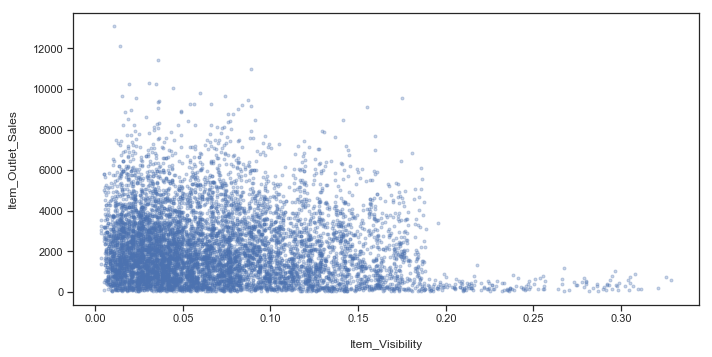

In [52]:
plt.figure(figsize=(10,5))
plt.xlabel("\nItem_Visibility")
plt.ylabel("Item_Outlet_Sales\n")
#plt.title("Item_Visibility Vs. Item_Outlet_Sales_Analysis\n", fontsize=15)
plt.plot(bm_data.Item_Visibility, bm_data["Item_Outlet_Sales"],'.', alpha = 0.3)

#### Create a broad category of Type of Item

Earlier we saw that the __Item_Type__ variable has _16 categores_ which might not prove to be very useful in analysis.So, it's good idea to combine them to 3 categories __"FD" (Food), "DR" (Drinks) and "NC" (Non-Consumables)__.

In [53]:
#Get the first two characters of ID:
bm_data['Item_Type_Combined'] = bm_data['Item_Identifier'].apply(lambda x: x[0:2])

#Rename them to more intuitive categories:
bm_data['Item_Type_Combined'] = bm_data['Item_Type_Combined'].map({'FD':'Food',
                                                             'NC':'Non-Consumable',
                                                             'DR':'Drinks'})
bm_data['Item_Type_Combined'].value_counts()

Food              10201
Non-Consumable     2686
Drinks             1317
Name: Item_Type_Combined, dtype: int64

#### Modify categories of Item_Fat_Content

In [54]:
#Change categories of low fat:
print('Original Categories:')
print(bm_data['Item_Fat_Content'].value_counts())

print('\nModified Categories:')
bm_data['Item_Fat_Content'] = bm_data['Item_Fat_Content'].replace({'LF':'Low Fat',
                                                             'reg':'Regular',
                                                             'low fat':'Low Fat'})

print(bm_data['Item_Fat_Content'].value_counts())


#Mark non-consumables as separate category in low_fat:
bm_data.loc[bm_data['Item_Type_Combined']=="Non-Consumable",'Item_Fat_Content'] = "Non-Edible"
bm_data['Item_Fat_Content'].value_counts()

Original Categories:
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

Modified Categories:
Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64


Low Fat       6499
Regular       5019
Non-Edible    2686
Name: Item_Fat_Content, dtype: int64

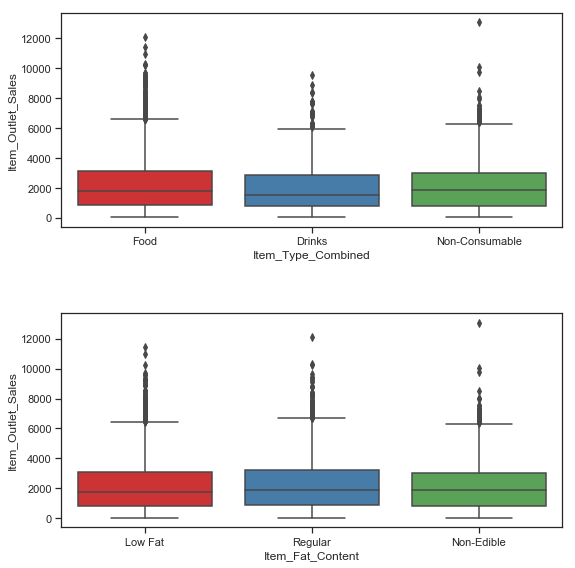

In [55]:
plt.figure(figsize = (8,5))

plt.subplot(211)
sns.boxplot(x='Item_Type_Combined', y='Item_Outlet_Sales', data=bm_data, palette="Set1")

plt.subplot(212)
sns.boxplot(x='Item_Fat_Content', y='Item_Outlet_Sales', data=bm_data, palette="Set1")

plt.subplots_adjust(wspace = 0.2, hspace = 0.4,top = 1.5)

plt.show()

#### Outlet_Identifier vs. Item_Outlet_Sales

Text(0, 0.5, 'Item_Outlet_Sales')

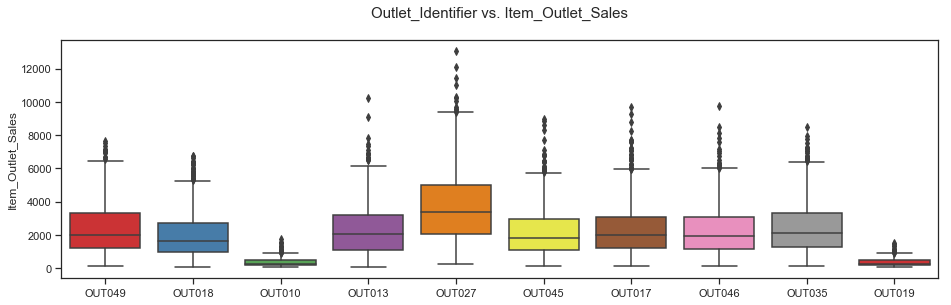

In [56]:
plt.figure(figsize = (14,9))

plt.subplot(211)
ax = sns.boxplot(x='Outlet_Identifier', y='Item_Outlet_Sales', data=bm_data, palette="Set1")
ax.set_title("Outlet_Identifier vs. Item_Outlet_Sales\n", fontsize=15)
ax.set_xlabel("", fontsize=12)
ax.set_ylabel("Item_Outlet_Sales", fontsize=12)

#### Item_Type vs. Item_Outlet_Sales

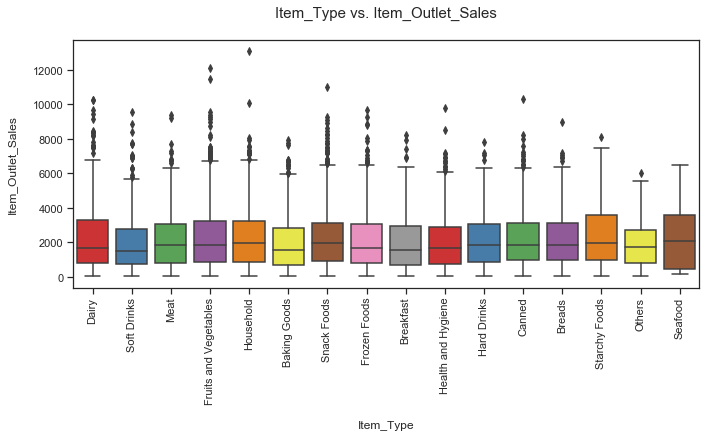

In [57]:
#plt.subplot(212)
plt.figure(figsize = (10,8))
ax = sns.boxplot(x='Item_Type', y='Item_Outlet_Sales', data=bm_data, palette="Set1")
ax.set_title("Item_Type vs. Item_Outlet_Sales\n", fontsize=15)
ax.set_xlabel("\nItem_Type", fontsize=12)
ax.set_ylabel("Item_Outlet_Sales\n", fontsize=12)

plt.subplots_adjust(hspace = 0.5, top = 0.5)
plt.setp(ax.get_xticklabels(), rotation=90)

plt.show()

#### Determine the years of operation of a store

In [58]:
bm_data.index = bm_data['Outlet_Establishment_Year']
bm_data.index

Int64Index([1999, 2009, 1999, 1998, 1987, 2009, 1987, 1985, 2002, 2007,
            ...
            1999, 1999, 2009, 1997, 1999, 1997, 2009, 2002, 2007, 2002],
           dtype='int64', name='Outlet_Establishment_Year', length=14204)

In [59]:
df = bm_data.loc[:,['Item_Outlet_Sales']]
df.head(2)

,Item_Outlet_Sales
Outlet_Establishment_Year,
1999,3735.1380
2009,443.4228


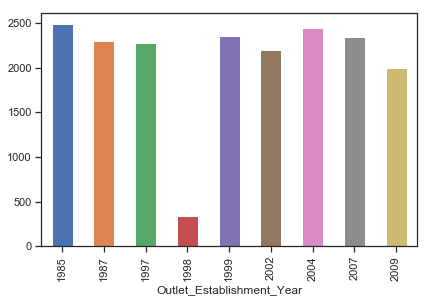

In [60]:
bm_data.groupby('Outlet_Establishment_Year')['Item_Outlet_Sales'].mean().plot.bar()

We wanted to make a new column depicting the years of operation of a store. 
This can be done as:

In [61]:
#Years:
bm_data['Outlet_Years'] = 2009 - bm_data['Outlet_Establishment_Year']
bm_data['Outlet_Years'].describe()

count    14204.000000
mean        11.169319
std          8.371664
min          0.000000
25%          5.000000
50%         10.000000
75%         22.000000
max         24.000000
Name: Outlet_Years, dtype: float64

- This shows stores which are 8-24 years old.

In [62]:
temp_data = bm_data.loc[bm_data['Outlet_Establishment_Year'] == 1998]
temp_data['Outlet_Type'].value_counts()

Grocery Store    925
Name: Outlet_Type, dtype: int64

#### Observation :
- There is only Grocery Store Type as Outlet_Type thus, __Item_Outlet_Sale is minimum__.

- Thought to remove those data as part of data cleaning for more accurate model, however we need to check first it's posibilities in test data as well.

In [63]:
test_temp_data = test.loc[test['Outlet_Establishment_Year'] == 1998]
test_temp_data['Outlet_Type'].value_counts()

Grocery Store    370
Name: Outlet_Type, dtype: int64

- Which shows resonably very low data however we can not remove it. so lets keep it as it is.

<a id=section0></a>
### Creating variable Item_Visibility_Mean_Ratio

We can create a new variable that show us the importance given to a product in a given store according to the mean of significance given to the same product in all other stores.

In [64]:
func = lambda x: x['Item_Visibility']/visibility_avg['Item_Visibility'][visibility_avg.index == x['Item_Identifier']][0]
bm_data['Item_Visibility_MeanRatio'] = bm_data.apply(func,axis=1).astype(float)
bm_data['Item_Visibility_MeanRatio'].describe()

count    14204.000000
mean         1.061884
std          0.235907
min          0.844563
25%          0.925131
50%          0.999070
75%          1.042007
max          3.010094
Name: Item_Visibility_MeanRatio, dtype: float64

### Numerical and One Hot Coding of Categorical Variables

In [65]:
#Import library:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

#New variable for outlet
bm_data['Outlet'] = le.fit_transform(bm_data['Outlet_Identifier'])
var_mod = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Item_Type_Combined','Outlet_Type','Outlet']
le = LabelEncoder()
for i in var_mod:
    bm_data[i] = le.fit_transform(bm_data[i])

To avoid overfitting and increase variance we must one hot encode the variables.

In [66]:
#One Hot Coding - Dummy Variables:

bm_data = pd.get_dummies(bm_data, columns=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type',
                              'Item_Type_Combined','Outlet'])

In [67]:
bm_data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Item_Outlet_Sales            float64
source                        object
Outlet_Years                   int64
Item_Visibility_MeanRatio    float64
Item_Fat_Content_0             uint8
Item_Fat_Content_1             uint8
Item_Fat_Content_2             uint8
Outlet_Location_Type_0         uint8
Outlet_Location_Type_1         uint8
Outlet_Location_Type_2         uint8
Outlet_Size_0                  uint8
Outlet_Size_1                  uint8
Outlet_Size_2                  uint8
Outlet_Type_0                  uint8
Outlet_Type_1                  uint8
Outlet_Type_2                  uint8
Outlet_Type_3                  uint8
Item_Type_Combined_0           uint8
Item_Type_Combined_1           uint8
Item_Type_Combined_2           uint8
O

#### Observation :
- Here we can see that all variables are now float and each category has a new variable. 
- Lets look at the 3 columns formed from Item_Fat_Content.

In [68]:
bm_data[['Item_Fat_Content_0','Item_Fat_Content_1','Item_Fat_Content_2']].head(10)

,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2
Outlet_Establishment_Year,,,
1999,1,0,0
2009,0,0,1
1999,1,0,0
1998,0,0,1
1987,0,1,0
2009,0,0,1
1987,0,0,1
1985,1,0,0
2002,0,0,1


We can notice that each row will have only one of the columns as 1 corresponding to the category in the original variable.

<br/>
<a id=section305></a>

### EDA Conclusions : 

- _Daily use products  have a higher tendancy_ to sell as compared to the specific use products.
- __Low Fat__ products have _higher sales_ values than __Regular__ products.
- The __Outlet type (OUT027)__ is of _Medium_ size belongs to _Supermarket Type3_ has a __highest sales__ which is expected followed by the _Grocery Stores (OUT010 and OUT019)_ and then with the most stores of type _Supermarket Type1 of size High_.
- Most stores have __outlet size Medium__ but still the _High and Small stores_ which are clearly in an _inferior number_ can beat or even come close to their numbers.
- New feature creation that shows the __sales ratio__ according to the _store size_ of outlet type.
- The stores from __Tier 2__ cities have __highest__ representation of stores, followed by _Tier 3_ cities, with _Tier 1_ cities with the lowest stores of the three type of locations.




<a id=section4></a>
## 4. Exporting Data

In [ ]:
#Drop the columns which have been converted to different types:
bm_data.drop(['Item_Type','Outlet_Establishment_Year'],axis=1,inplace=True)

#Divide into test and train:
train = bm_data.loc[bm_data['source']=="train"]
test = bm_data.loc[bm_data['source']=="test"]

#Drop unnecessary columns:
test.drop(['Item_Outlet_Sales','source'],axis=1,inplace=True)
train.drop(['source'],axis=1,inplace=True)

In [ ]:
#Export files as modified versions:
train.to_csv("Train_modified.csv",index=False)
test.to_csv("Test_modified.csv",index=False)

<a id=section5></a>

<a id=section5></a>
## 5. Model Building

In [71]:
train_df = pd.read_csv('train_modified.csv')
test_df = pd.read_csv('test_modified.csv')

Let's define a _generic function_ which takes the algorithm and data as input and __makes the model, performs cross-validation__.

In [72]:
#Define target and ID columns:
target = 'Item_Outlet_Sales'
IDcol = ['Item_Identifier','Outlet_Identifier']
from sklearn import cross_validation, metrics
def modelfit(alg, dtrain, dtest, predictors, target, IDcol, filename):
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain[target])
    
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])

    #Perform cross-validation:
    cv_score = cross_validation.cross_val_score(alg, dtrain[predictors], dtrain[target], cv=20, scoring='mean_squared_error')
    cv_score = np.sqrt(np.abs(cv_score))
    
    #Print model report:
    print ("\nModel Report")
    print ("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(dtrain[target].values, dtrain_predictions)))
    print ("CV Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
    
    
    #Predict on testing data:
    dtest[target] = alg.predict(dtest[predictors])
    
    #Accuracy on training data:
    X_train = train_df.drop(['Item_Outlet_Sales','Item_Identifier','Outlet_Identifier'],axis=1)
    Y_train = train_df['Item_Outlet_Sales']
    print ("Accuracy : %.4g" % round(alg.score(X_train,Y_train)*100,2),"%")
    
    
    #Export submission file:
    IDcol.append(target)
    submission = pd.DataFrame({ x: dtest[x] for x in IDcol})
    submission.to_csv(filename, index=False)

<a id=section501></a>
### Linear Regression Model



Model Report
RMSE : 1127
CV Score : Mean - 1129 | Std - 43.35 | Min - 1074 | Max - 1211
Accuracy : 56.35 %

Model has been successfully created and trained. The predicted result is in alg1_linear_reg.csv



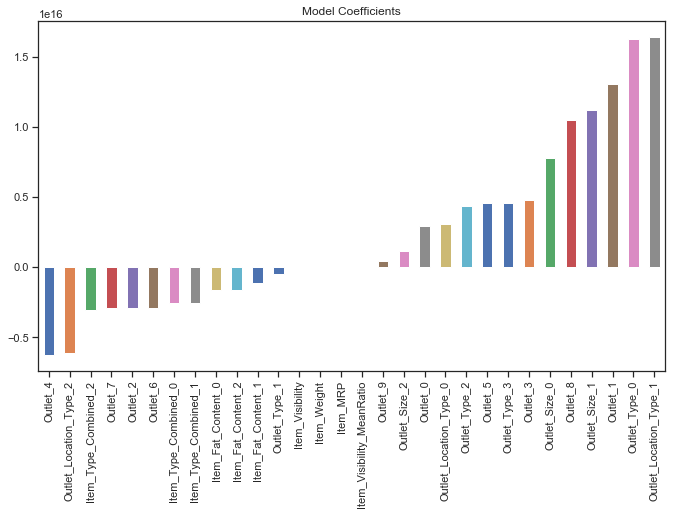

In [73]:
from sklearn.linear_model import LinearRegression

predictors = [x for x in train_df.columns if x not in [target]+IDcol]
alg1 = LinearRegression(normalize=True)
modelfit(alg1, train_df, test_df, predictors, target, IDcol, 'alg1_linear_reg.csv')
coef1 = pd.Series(alg1.coef_, predictors).sort_values()
coef1.plot(kind='bar', title='Model Coefficients', figsize=(10,6))

print("\nModel has been successfully created and trained. The predicted result is in alg1_linear_reg.csv\n")

#### Observation :
-  We can notice that, the coefficients are very large in magnitude which signifies overfitting. 

<a id=section502></a>
### Decision Tree Model


Lets try out a decision tree model and see if we get something better.


Model Report
RMSE : 1058
CV Score : Mean - 1091 | Std - 44.44 | Min - 1006 | Max - 1184
Accuracy : 61.58 %

Model has been successfully created and trained. The predicted result is in alg2_decision_tree.csv



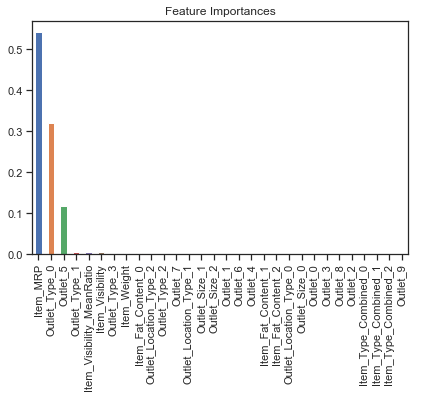

In [74]:
from sklearn.tree import DecisionTreeRegressor
predictors = [x for x in train_df.columns if x not in [target]+IDcol]
alg2 = DecisionTreeRegressor(max_depth=15, min_samples_leaf=100)

modelfit(alg2, train_df, test_df, predictors, target, IDcol, 'alg2_decision_tree.csv')
coef2 = pd.Series(alg2.feature_importances_, predictors).sort_values(ascending=False)
coef2.plot(kind='bar', title='Feature Importances')

print("\nModel has been successfully created and trained. The predicted result is in alg2_decision_tree.csv\n")


Here you can see that the __RMSE is 1060 and the Mean CV Error is 1091__. This tells us that the model is slightly overfitting. <br/>
Lets try making a decision tree with just top 4 variables, a max_depth of 8 and min_samples_leaf as 150.


Model Report
RMSE : 1069
CV Score : Mean - 1096 | Std - 42.95 | Min - 1026 | Max - 1180
Accuracy : 60.77 %

Model has been successfully created and trained. The predicted result is in alg3_decision_tree.csv



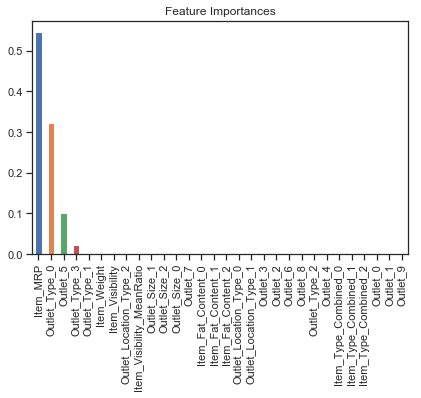

In [75]:
#predictors = ['Item_MRP','Outlet_Type_0','Outlet_5']
predictors = [x for x in train_df.columns if x not in [target]+IDcol]
alg3 = DecisionTreeRegressor(max_depth=8, min_samples_leaf=150)
modelfit(alg3, train_df, test_df, predictors, target, IDcol, 'alg3_decision_tree.csv')
coef3 = pd.Series(alg3.feature_importances_, predictors).sort_values(ascending=False)
coef3.plot(kind='bar', title='Feature Importances')

print("\nModel has been successfully created and trained. The predicted result is in alg3_decision_tree.csv\n")


<a id=section503></a>
### Random Forest Model


Model Report
RMSE : 1074
CV Score : Mean - 1084 | Std - 43.64 | Min - 1020 | Max - 1161
Accuracy : 60.42 %

Model has been successfully created and trained. The predicted result is in alg4_random_forest.csv



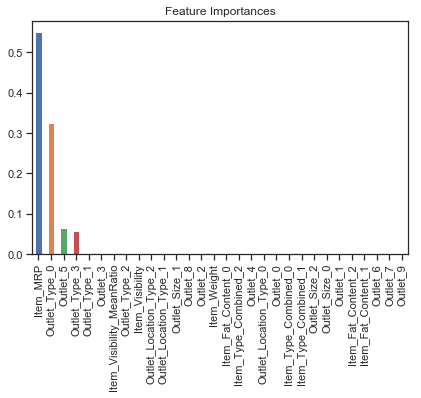

In [76]:
from sklearn.ensemble import RandomForestRegressor
predictors = [x for x in train_df.columns if x not in [target]+IDcol]

alg4 = RandomForestRegressor(n_estimators=200,max_depth=5, min_samples_leaf=100,n_jobs=4)
modelfit(alg4, train_df, test_df, predictors, target, IDcol, 'alg4_random_forest.csv')
coef4 = pd.Series(alg4.feature_importances_, predictors).sort_values(ascending=False)
coef4.plot(kind='bar', title='Feature Importances')

print("\nModel has been successfully created and trained. The predicted result is in alg4_random_forest.csv\n")


We might feel this is a very small improvement but as our model gets better, achieving even minute improvements becomes exponentially difficult. <br/>Lets try another random forest with max_depth of 6 and 400 trees with 2 jobs. 
Increasing the number of trees makes the model robust but is computationally expensive.


Model Report
RMSE : 415.5
CV Score : Mean - 1129 | Std - 46.82 | Min - 1048 | Max - 1216
Accuracy : 94.07 %

Model has been successfully created and trained. The predicted result is in alg5_random_forest.csv



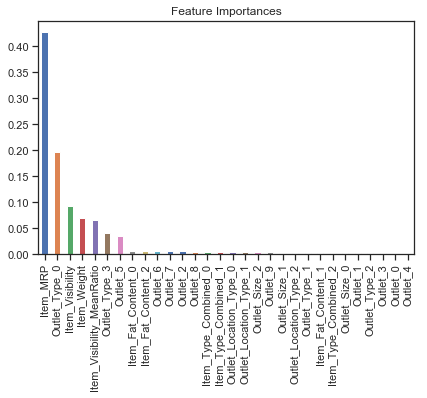

In [77]:
predictors = [x for x in train_df.columns if x not in [target]+IDcol]
alg5 = RandomForestRegressor(n_estimators=400,n_jobs=-1)
modelfit(alg5, train_df, test_df, predictors, target, IDcol, 'alg5_random_forest.csv')
coef5 = pd.Series(alg5.feature_importances_, predictors).sort_values(ascending=False)
coef5.plot(kind='bar', title='Feature Importances')

print("\nModel has been successfully created and trained. The predicted result is in alg5_random_forest.csv\n")


### 5.7 Conclusion

- After implementing the ML algorithm’s, __Random Forest model with Accuracy = 94% and RMSE=415__ performed better which got me in the first 25%.